In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.isnull

<bound method DataFrame.isnull of         Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000>

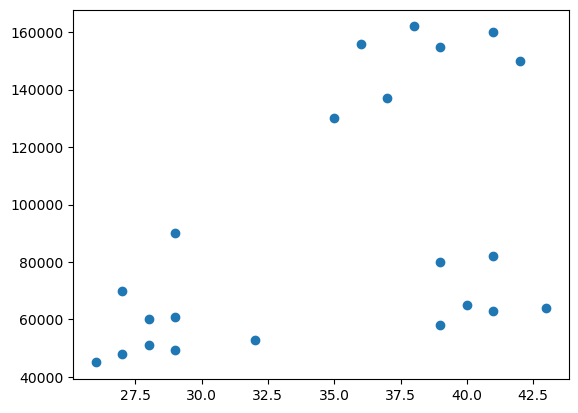

In [4]:
plt.scatter(df.Age, df['Income($)'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

APPEND CLUSTERS IN DATAFRAME

In [9]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,27,70000,1,1
1,Michael,29,90000,1,1
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


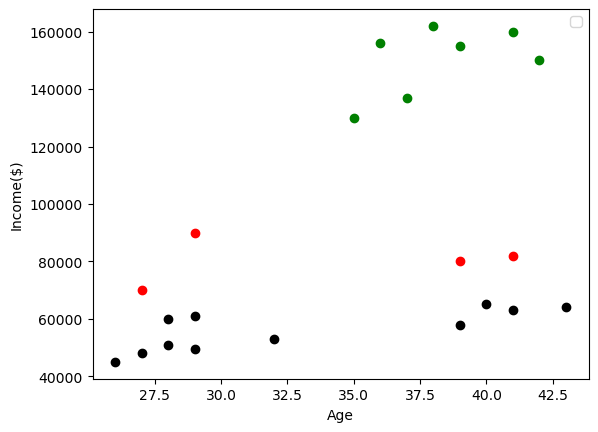

In [12]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'],color='green')
plt.scatter(df2.Age, df2['Income($)'],color='red')
plt.scatter(df3.Age, df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

the clusters are not properly arranged due to scaling, so we rescale

In [17]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,0,0
5,Gautam,0.764706,0.940171,0,0
6,David,0.882353,0.982906,0,0
7,Andrea,0.705882,1.000000,0,0
8,Brad,0.588235,0.948718,0,0
9,Angelina,0.529412,0.726496,0,0


In [18]:
km=KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,0,0


In [25]:
df.drop('clusters', axis='columns', inplace=True)
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


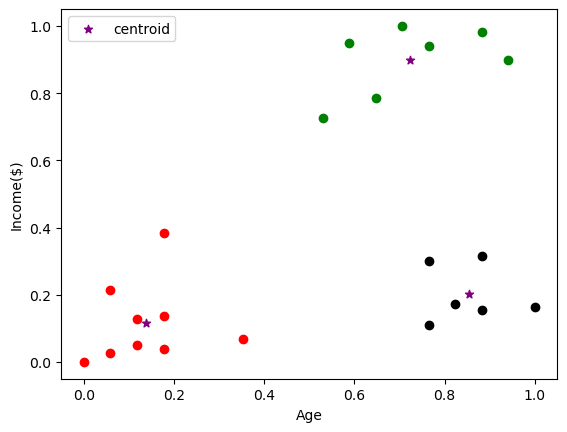

In [28]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'],color='green')
plt.scatter(df2.Age, df2['Income($)'],color='red')
plt.scatter(df3.Age, df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

elbow plot method to know k just incase

In [31]:
k_rng=range(1,12)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

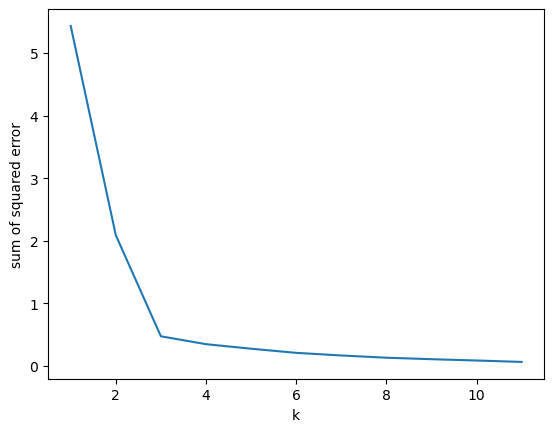

In [32]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng, sse)

In [33]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.2766936276300278,
 0.2105547899547249,
 0.1685851223602976,
 0.13265419827245162,
 0.10907864282306065,
 0.08823789557161342,
 0.06554005805181388]